# NEISS Descriptive Analysis

This notebook provides exploratory data analysis (EDA) of the sampled NEISS dataset, including basic statistics, trend analysis, and visualizations.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sampled NEISS data
# file_path = './data/consolidated_cleaned_neiss_2014_2023.csv'
file_path = './data/code_replaced_neiss_2014_2023.csv'
df = pd.read_csv(file_path, low_memory=False)

# Convert 'Treatment_Date' to datetime format
df['Treatment_Date'] = pd.to_datetime(df['Treatment_Date'], errors='coerce')
    

In [16]:

# Basic descriptive statistics for numeric columns
numeric_summary = df.describe()
numeric_summary
    

,CPSC_Case_Number,Treatment_Date,Age,Other_Race,PSU,Weight,Year,Month,Day
count,3.520522e+06,3520522,3.520522e+06,0.0,3.520522e+06,3.520522e+06,3.520522e+06,3.520522e+06,3.520522e+06
mean,1.847894e+08,2018-11-13 17:29:47.034764544,3.279220e+01,NaN,4.497654e+01,3.766480e+01,2.018369e+03,6.525709e+00,1.569326e+01
min,1.401040e+08,2014-01-01 00:00:00,0.000000e+00,NaN,1.000000e+00,4.505600e+00,2.014000e+03,1.000000e+00,1.000000e+00
25%,1.606368e+08,2016-06-03 00:00:00,1.000000e+01,NaN,2.100000e+01,1.477560e+01,2.016000e+03,4.000000e+00,8.000000e+00
50%,1.810239e+08,2018-09-28 00:00:00,2.400000e+01,NaN,4.000000e+01,1.722230e+01,2.018000e+03,7.000000e+00,1.600000e+01
75%,2.106023e+08,2021-05-15 00:00:00,5.500000e+01,NaN,6.800000e+01,7.287300e+01,2.021000e+03,9.000000e+00,2.300000e+01
max,2.403034e+08,2023-12-31 00:00:00,1.130000e+02,NaN,1.010000e+02,1.121671e+02,2.023000e+03,1.200000e+01,3.100000e+01
std,2.874207e+07,NaN,2.718635e+01,NaN,2.877853e+01,3.110229e+01,2.860711e+00,3.331375e+00,8.797846e+00


In [17]:

# Basic summary for categorical columns
categorical_summary = df.describe(include=['object', 'category'])
categorical_summary
    

,Sex,Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative,Stratum
count,3520522,3520522,1670132,3520522,3520522,585796,3520522,360488,78807,3520522,3520522,3520522,3520522,556528,33063,1670132,1670132,3520522,3520522
unique,4,7,3,26,30,26197,26,30,4555,7,9,4,806,777,597,2,2,3489913,5
top,MALE,WHITE,No,HEAD,LACERATION,PAIN,INTERNAL,OTHER,PAIN,TREATED/EXAMINED AND RELEASED,HOME,NO/?,FLOORS OR FLOORING MATERIALS,FLOORS OR FLOORING MATERIALS,FLOORS OR FLOORING MATERIALS,No/Unk,No/Unk,2 YOF WITH A BEAD IN NOSE DX FB NOSE,V
freq,1906287,1567434,972200,606221,597504,231766,3160585,78837,42641,3085714,1505894,3503686,285728,151417,9332,1638014,1635017,49,1351707


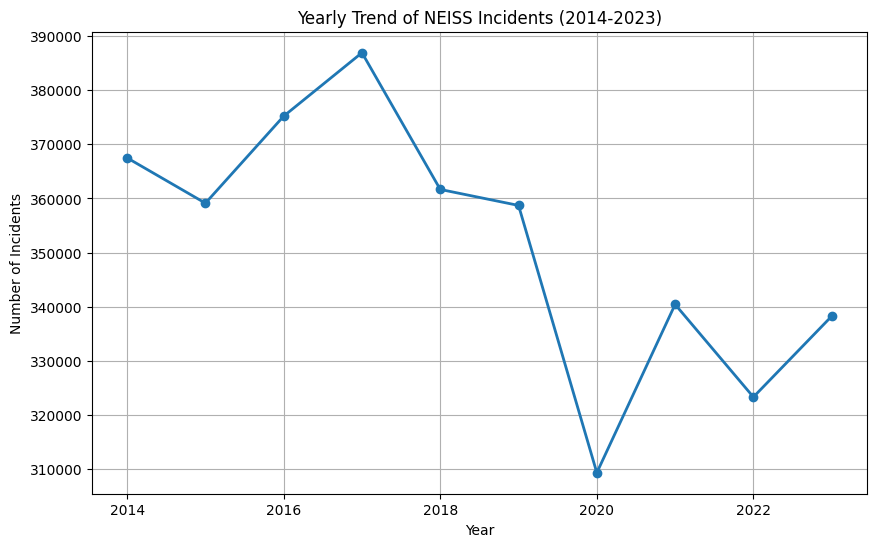

In [18]:

# Yearly trend analysis
yearly_trend = df.groupby('Year').size()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', linewidth=2)
plt.title("Yearly Trend of NEISS Incidents (2014-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid()
plt.show()
    

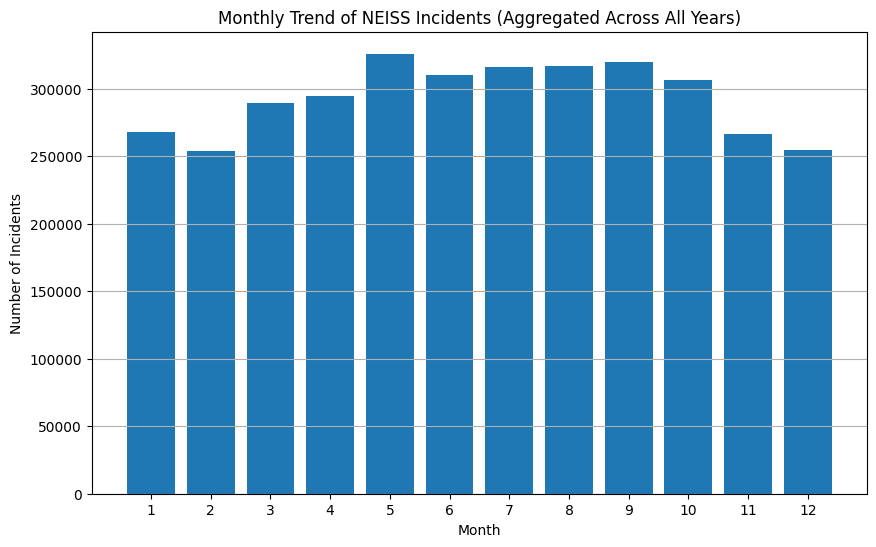

In [19]:

# Monthly trend analysis
monthly_trend = df.groupby('Month').size()

# Plot the monthly trend
plt.figure(figsize=(10, 6))
plt.bar(monthly_trend.index, monthly_trend.values)
plt.title("Monthly Trend of NEISS Incidents (Aggregated Across All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()
    

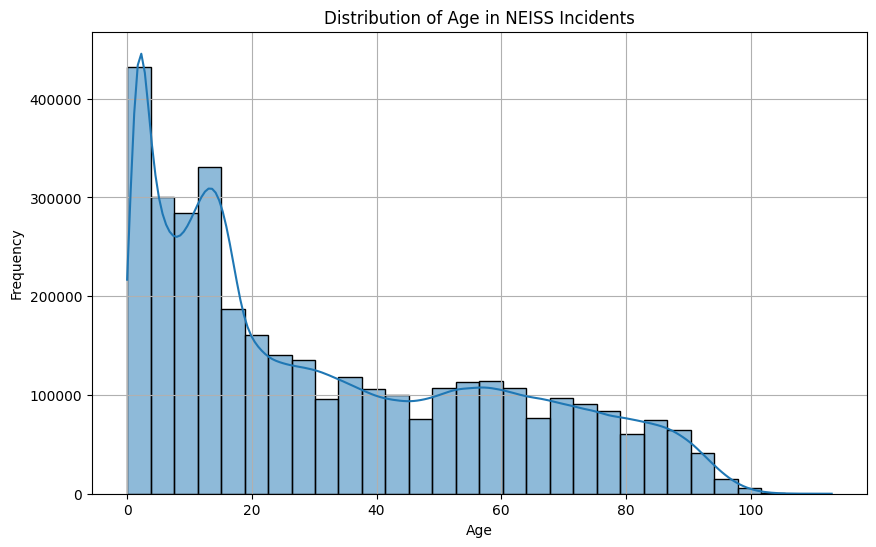

In [20]:

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age in NEISS Incidents")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()
    

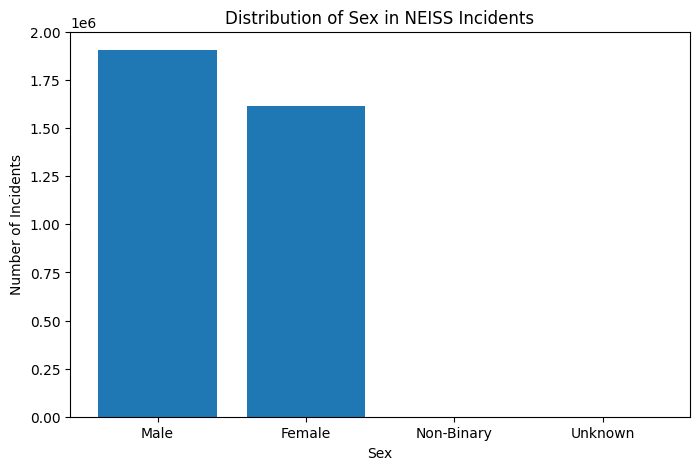

In [21]:

# Distribution of Sex
sex_distribution = df['Sex'].value_counts()
labels = ['Male', 'Female', 'Non-Binary', 'Unknown']

plt.figure(figsize=(8, 5))
plt.bar(labels, sex_distribution.values)
plt.title("Distribution of Sex in NEISS Incidents")
plt.xlabel("Sex")
plt.ylabel("Number of Incidents")
plt.show()
    

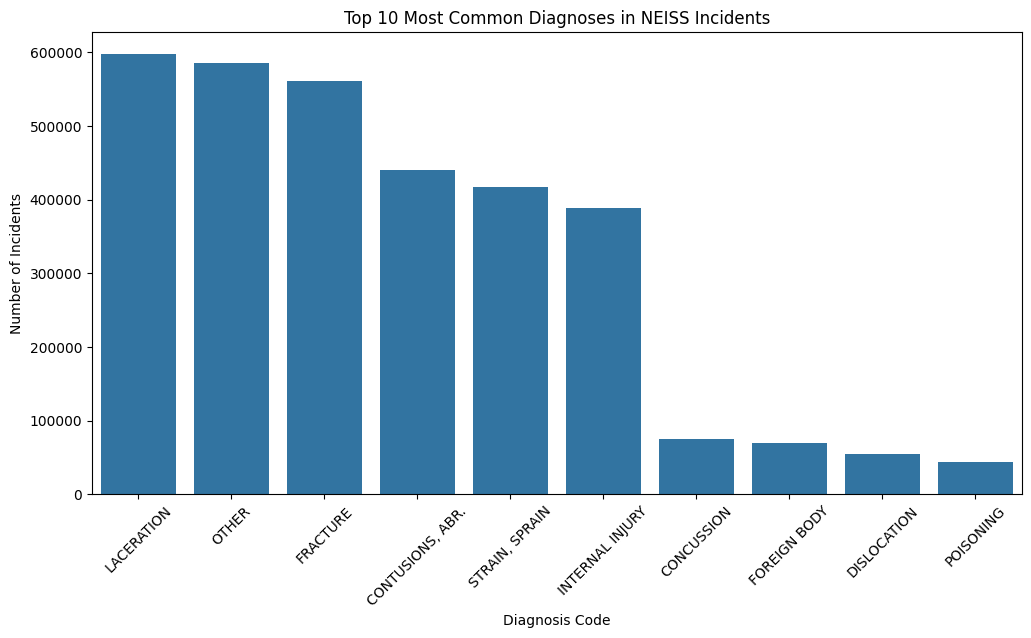

In [22]:

# Top 10 common diagnoses
diagnosis_distribution = df['Diagnosis'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=diagnosis_distribution.index, y=diagnosis_distribution.values)
plt.title("Top 10 Most Common Diagnoses in NEISS Incidents")
plt.xlabel("Diagnosis Code")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()
    